# MAT281 - Laboratorio N°06



## Problema 01
<img src="./images/logo_iris.jpg" width="360" height="360" align="center"/>

El **Iris dataset** es un conjunto de datos que contine una  muestras de tres especies de Iris (Iris setosa, Iris virginica e Iris versicolor). Se midió cuatro rasgos de cada muestra: el largo y ancho del sépalo y pétalo, en centímetros.

Lo primero es cargar el conjunto de datos y ver las primeras filas que lo componen:

In [1]:
# librerias
 
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option('display.max_columns', 500)  # Ver más columnas de los dataframes


# Ver gráficos de matplotlib en jupyter notebook/lab
%matplotlib inline

In [2]:
# cargar datos
df = pd.read_csv(os.path.join("data","iris_contaminados.csv"))
df.columns = ['sepalLength',
                  'sepalWidth',
                  'petalLength',
                  'petalWidth',
                  'species']

df.head() 

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,4.4,3.2,1.3,3.0,setosa
1,7.2,3.6,6.1,2.5,virginica
2,6.3,3.3,6.0,2.5,VIRGINICA
3,6.7,3.3,5.7,2.5,virginica
4,6.3,3.4,5.6,2.4,virginica


### Bases del experimento

Lo primero es identificar las variables que influyen en el estudio y la naturaleza de esta.

* **species**: 
    * Descripción: Nombre de la especie de Iris. 
    * Tipo de dato: *string*
    * Limitantes: solo existen tres tipos (setosa, virginia y versicolor).
* **sepalLength**: 
    * Descripción: largo del sépalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 4.0 y 7.0 cm.
* **sepalWidth**: 
    * Descripción: ancho del sépalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 2.0 y 4.5 cm.
* **petalLength**: 
    * Descripción: largo del pétalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 1.0 y 7.0 cm.
* **petalWidth**: 
    * Descripción: ancho del pépalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 0.1 y 2.5 cm.

Su objetivo es realizar un correcto **E.D.A.**, para esto debe seguir las siguientes intrucciones:

1. Realizar un conteo de elementos de la columna **species** y corregir según su criterio. Reemplace por "default" los valores nan..

In [3]:
df["species"]=df["species"].str.lower().str.strip()
df.loc[df["species"].isnull(),"species"]="no especie"

In [4]:
df2=pd.DataFrame(df["species"].value_counts())
df2

,species
setosa,50
virginica,50
versicolor,49
no especie,1


2. Realizar un gráfico de box-plot sobre el largo y ancho de los petalos y sépalos. Reemplace por **0** los valores nan.

In [5]:
#reemplazamos por 0 los nan:
for col in df.columns[:-1]:
    df.loc[df[col].isnull(),col]=0

<AxesSubplot:>

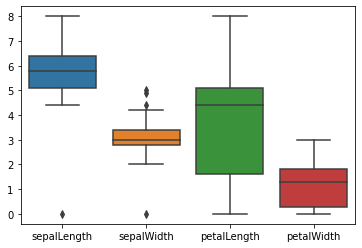

In [6]:
stats_df = df.drop(['species'], axis=1)
sns.boxplot(data=stats_df)

3. Anteriormente se define un rango de valores válidos para los valores del largo y ancho de los petalos y sépalos. Agregue una columna denominada **label**  que identifique cuál de estos valores esta fuera del rango de valores válidos.

In [7]:
lv=np.zeros(df.shape[0])
for i in range(df.shape[0]):
        if 7.0 >=df.iloc[i]['sepalLength']>= 4.0 and 4.5 >=df.iloc[i]['sepalWidth']>= 2.0 and 7.0 >=df.iloc[i]['petalLength']>= 1.0 and 2.5 >=df.iloc[i]['petalWidth']>= 0.1:
            lv[i]=1
df=df.assign(label=lv)
df

,sepalLength,sepalWidth,petalLength,petalWidth,species,label
0,4.4,3.2,1.3,3.0,setosa,0.0
1,7.2,3.6,6.1,2.5,virginica,0.0
2,6.3,3.3,6.0,2.5,virginica,1.0
3,6.7,3.3,5.7,2.5,virginica,1.0
4,6.3,3.4,5.6,2.4,virginica,1.0
...,...,...,...,...,...,...
145,5.3,3.0,1.1,0.1,setosa,1.0
146,4.8,3.0,1.4,0.1,setosa,1.0
147,4.9,3.1,1.5,0.1,setosa,1.0
148,4.9,3.6,1.4,0.1,setosa,1.0


4. Realice un gráfico de *sepalLength* vs *petalLength* y otro de *sepalWidth* vs *petalWidth* categorizados por la etiqueta **label**. Concluya sus resultados.

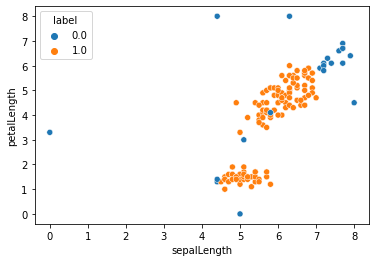

In [8]:
sns.scatterplot(
    data = df, 
    x = 'sepalLength',  
    y = 'petalLength', 
    hue = 'label' 
)
plt.show()

In [ ]:
sns.scatterplot(
    data = df,  
    x = 'sepalWidth', 
    y = 'petalWidth', 
    hue = 'label' 
)
plt.show()

5. Filtre los datos válidos y realice un gráfico de *sepalLength* vs *petalLength* categorizados por la etiqueta **species**.

In [ ]:
sns.scatterplot(
    data = df.loc[df['label']==True], 
    x = 'sepalLength', 
    y = 'petalLength', 
    hue = 'species' 
)
plt.show()